In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
data=pd.read_csv("all.csv")

In [3]:
print(data.head(20))

        name  Gun  Knife  Wrench  Pliers  Scissors
0   N0000001   -1     -1      -1      -1        -1
1   N0000002   -1     -1      -1      -1        -1
2   N0000003   -1     -1      -1      -1        -1
3   N0000004   -1     -1      -1      -1        -1
4   N0000005   -1     -1      -1      -1        -1
5   N0000006   -1     -1      -1      -1        -1
6   N0000007   -1     -1      -1      -1        -1
7   N0000008   -1     -1      -1      -1        -1
8   N0000009   -1     -1      -1      -1        -1
9   N0000010   -1     -1      -1      -1        -1
10  N0000011   -1     -1      -1      -1        -1
11  N0000012   -1     -1      -1      -1        -1
12  N0000013   -1     -1      -1      -1        -1
13  N0000014   -1     -1      -1      -1        -1
14  N0000015   -1     -1      -1      -1        -1
15  N0000016   -1     -1      -1      -1        -1
16  N0000017   -1     -1      -1      -1        -1
17  N0000018   -1     -1      -1      -1        -1
18  N0000019   -1     -1      -

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054911 entries, 0 to 1054910
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   name      1054911 non-null  object
 1   Gun       1054911 non-null  int64 
 2   Knife     1054911 non-null  int64 
 3   Wrench    1054911 non-null  int64 
 4   Pliers    1054911 non-null  int64 
 5   Scissors  1054911 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 48.3+ MB
None


In [5]:
X = data["name"]
Y = data.drop(labels = ["name"],axis = 1) 

In [6]:
print(X.head(30))

0     N0000001
1     N0000002
2     N0000003
3     N0000004
4     N0000005
5     N0000006
6     N0000007
7     N0000008
8     N0000009
9     N0000010
10    N0000011
11    N0000012
12    N0000013
13    N0000014
14    N0000015
15    N0000016
16    N0000017
17    N0000018
18    N0000019
19    N0000020
20    N0000021
21    N0000022
22    N0000023
23    N0000024
24    N0000025
25    N0000026
26    N0000027
27    N0000028
28    N0000029
29    N0000030
Name: name, dtype: object


In [7]:
# eldata elly m3ana arkamha mn 262576:315090          , m3ana 52515 sora
x=X[262575:315090]
y=X[262575:315090]

# example leltasheel welsor3a
# x=X[262575:262580]
# y=X[262575:262580]
x

262575    N0262576
262576    N0262577
262577    N0262578
262578    N0262579
262579    N0262580
            ...   
315085    N0315086
315086    N0315087
315087    N0315088
315088    N0315089
315089    N0315090
Name: name, Length: 52515, dtype: object

In [8]:
x_train=[]
trainpath="E:/dataset/5/5/"
# files = gb.glob(pathname= str(trainpath + '/*.jpg'))
for i in x: 
    file=str(trainpath+i+'.jpg')
    image = cv2.imread(file)
    image = cv2.resize(image , (300,300))
    x_train.append(list(image))

In [9]:
print(f'we have {len(x_train)} items in x_train')

we have 52515 items in x_train


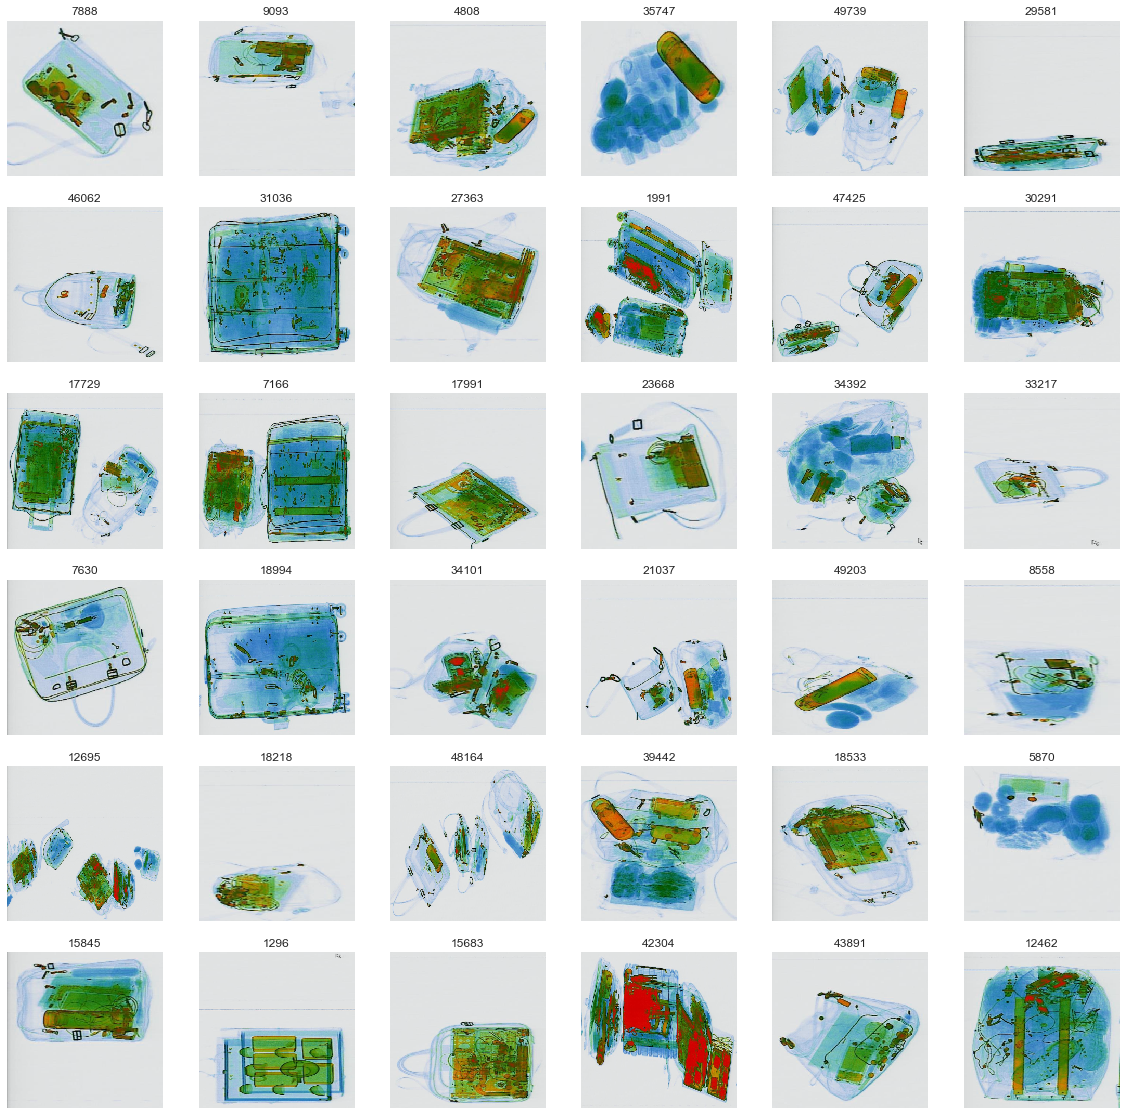

In [10]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])    
    plt.axis('off')
    plt.title(str(i))

In [11]:
print(x_train[0])

[array([[215, 217, 217],
       [215, 217, 217],
       [215, 217, 217],
       [216, 217, 217],
       [216, 218, 218],
       [216, 218, 218],
       [217, 219, 219],
       [217, 219, 219],
       [217, 219, 219],
       [218, 220, 220],
       [219, 221, 221],
       [219, 221, 221],
       [220, 222, 222],
       [220, 222, 222],
       [219, 221, 221],
       [219, 221, 221],
       [218, 220, 220],
       [218, 220, 220],
       [220, 222, 222],
       [220, 222, 222],
       [220, 222, 222],
       [220, 222, 222],
       [220, 222, 222],
       [220, 222, 222],
       [220, 222, 222],
       [220, 222, 222],
       [220, 222, 222],
       [221, 223, 223],
       [220, 222, 222],
       [220, 222, 222],
       [220, 222, 222],
       [220, 222, 222],
       [221, 223, 223],
       [222, 224, 224],
       [223, 224, 224],
       [223, 224, 224],
       [222, 224, 224],
       [222, 224, 224],
       [222, 224, 224],
       [222, 224, 224],
       [222, 224, 224],
       [222, 22

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y, test_size = 0.1, random_state=2)

In [13]:
print(X_train[0])

[array([[179, 181, 181],
       [196, 198, 198],
       [206, 208, 208],
       [206, 208, 208],
       [208, 210, 210],
       [211, 214, 214],
       [215, 217, 217],
       [215, 217, 217],
       [215, 217, 217],
       [215, 217, 217],
       [215, 217, 217],
       [217, 219, 219],
       [218, 220, 220],
       [218, 220, 220],
       [219, 221, 221],
       [220, 222, 222],
       [220, 222, 222],
       [219, 221, 221],
       [218, 220, 220],
       [219, 221, 221],
       [220, 222, 222],
       [220, 222, 222],
       [221, 223, 223],
       [220, 222, 222],
       [220, 222, 222],
       [219, 221, 221],
       [221, 223, 223],
       [221, 223, 223],
       [221, 223, 223],
       [221, 223, 223],
       [221, 223, 223],
       [221, 223, 223],
       [222, 224, 224],
       [222, 224, 224],
       [222, 224, 224],
       [222, 224, 224],
       [222, 224, 224],
       [222, 224, 224],
       [222, 224, 224],
       [222, 224, 224],
       [222, 224, 224],
       [223, 22

In [14]:
X_train = np.array(X_train,dtype=float)
X_test = np.array(X_test,dtype=float)
X_train=X_train/255.0
X_test=X_test/255.0

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')

MemoryError: 